In [4]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import os
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 5.6 MB/s eta 0:01:10
   ---------------------------------------- 1.6/390.3 MB 4.6 MB/s eta 0:01:24
   ---------------------------------------- 2.9/390.3 MB 5.4 MB/s eta 0:01:12
   ---------------------------------------- 4.7/390.3 M

In [3]:
Train_Dir=r'C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\train'
Test_Dir=r'C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\validation'

In [6]:
def createDataFrames(dir):
  image_paths=[]
  labels=[]
  for label in os.listdir(dir):
    for imagename in os.listdir(os.path.join(dir,label)):
      image_paths.append(os.path.join(dir,label,imagename))
      labels.append(label)
    print(label,'completed')
  return image_paths,labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = createDataFrames(Train_Dir)

In [5]:
print(train)

                                                   image     label
0      C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
1      C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
2      C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
3      C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
4      C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
...                                                  ...       ...
28816  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
28817  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
28818  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
28819  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
28820  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createDataFrames(Test_Dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                                                  image     label
0     C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
1     C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
2     C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
3     C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
4     C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...     angry
...                                                 ...       ...
7061  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
7062  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
7063  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
7064  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise
7065  C:\Users\Vivek Singh\Desktop\dhruvv\emotion re...  surprise

[7066 rows x 2 columns]


In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [ ]:
train_features= extract_features(train['image'])

In [14]:

# Save the features as a .npy file
np.save("train_features.npy", train_features)


In [10]:
# Load the features from the .npy file
train_features = np.load("train_features.npy")


In [ ]:
test_features= extract_features(test['image'])

In [ ]:

# Save the test features as a .npy file
np.save("test_features.npy", test_features)


In [12]:
# Load the test features from the .npy file
test_features = np.load("test_features.npy")

In [13]:
x_train=train_features/255.0
x_test=test_features/255.0

In [15]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [17]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [18]:
model= Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7,activation='softmax'))

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
import tensorflow as tf
model.load_weights("model_epoch_19.h5")  # Replace 50 with the last epoch you saved

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "model_epoch_{epoch:02d}.h5",  # Save weights with epoch number in filename
    save_best_only=False,          # Save at every epoch (not just the best model)
    save_weights_only=True,        # Save only weights
)

# Continue training
model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=50,  # Adjust as needed
    validation_data=(x_test, y_test),
    callbacks=[checkpoint_cb]
)

Epoch 1/50
226/226 [==============================] - 807s 4s/step - loss: 0.9611 - accuracy: 0.6386 - val_loss: 1.0367 - val_accuracy: 0.6138
Epoch 2/50
226/226 [==============================] - 769s 3s/step - loss: 0.9504 - accuracy: 0.6424 - val_loss: 1.0309 - val_accuracy: 0.6197
Epoch 3/50
226/226 [==============================] - 753s 3s/step - loss: 0.9435 - accuracy: 0.6450 - val_loss: 1.0404 - val_accuracy: 0.6237
Epoch 4/50
226/226 [==============================] - 724s 3s/step - loss: 0.9341 - accuracy: 0.6501 - val_loss: 1.0375 - val_accuracy: 0.6146
Epoch 5/50
226/226 [==============================] - 715s 3s/step - loss: 0.9292 - accuracy: 0.6525 - val_loss: 1.0355 - val_accuracy: 0.6231
Epoch 6/50
226/226 [==============================] - 733s 3s/step - loss: 0.9275 - accuracy: 0.6526 - val_loss: 1.0425 - val_accuracy: 0.6169
Epoch 7/50
226/226 [==============================] - 738s 3s/step - loss: 0.9188 - accuracy: 0.6557 - val_loss: 1.0437 - val_accuracy: 0.6163

KeyboardInterrupt: 

In [22]:
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [23]:
model.save_weights("emotion_model.h5")

In [24]:
from pathlib import Path

file_path = Path("C:/Users/Vivek Singh/emotion_model.json")
json_file = open(file_path, "r")

In [2]:
from keras.models import model_from_json
from pathlib import Path

# Load the model architecture
file_path = Path("C:/Users/Vivek Singh/emotion_model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)

# Load the weights
model.load_weights("C:/Users/Vivek Singh/emotion_model.h5")

print("Model loaded successfully.")

Model loaded successfully.


In [3]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [4]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [5]:
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\train\angry\120.jpg"
print("Original image is of angry")

# Preprocess the image (assuming ef is a preprocessing function)
img = ef(image)

# Predict using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is:", pred_label)

Original image is of angry


D:\anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 2s 2s/step
Model prediction is: angry


In [30]:
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\train\happy\103.jpg"
print("Original image is of happy")

# Preprocess the image (assuming ef is a preprocessing function)
img = ef(image)

# Predict using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is:", pred_label)

Original image is of happy
1/1 [==============================] - 0s 66ms/step
Model prediction is: happy


In [31]:
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\train\sad\130.jpg"
print("Original image is of sad")

# Preprocess the image (assuming ef is a preprocessing function)
img = ef(image)

# Predict using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is:", pred_label)

Original image is of sad
1/1 [==============================] - 0s 56ms/step
Model prediction is: sad


In [32]:
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\train\neutral\11.jpg"
print("Original image is of neutral")

# Preprocess the image (assuming ef is a preprocessing function)
img = ef(image)

# Predict using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is:", pred_label)

Original image is of neutral
1/1 [==============================] - 0s 50ms/step
Model prediction is: neutral


In [39]:
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\validation\surprise\947.jpg"
print("Original image is of surprise")

# Preprocess the image (assuming ef is a preprocessing function)
img = ef(image)

# Predict using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is:", pred_label)

Original image is of surprise
1/1 [==============================] - 0s 47ms/step
Model prediction is: surprise


In [44]:
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\validation\fear\258.jpg"
print("Original image is of fear")

# Preprocess the image (assuming ef is a preprocessing function)
img = ef(image)

# Predict using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is:", pred_label)

Original image is of fear
1/1 [==============================] - 0s 53ms/step
Model prediction is: fear


In [46]:
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\validation\disgust\8726.jpg"
print("Original image is of disgust")

# Preprocess the image (assuming ef is a preprocessing function)
img = ef(image)

# Predict using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is:", pred_label)

Original image is of disgust
1/1 [==============================] - 0s 47ms/step
Model prediction is: disgust


original image is of sad
1/1 [==============================] - 4s 4s/step
model prediction is  sad


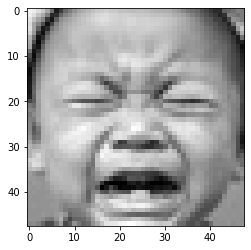

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
image = r"C:\Users\Vivek Singh\Desktop\dhruvv\emotion recognition\images\train\sad\130.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [65]:
import cv2
import numpy as np
import tensorflow as tf
import random

from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import get_custom_objects


In [ ]:
import cv2
import numpy as np
from keras.models import Sequential, model_from_json
from keras.saving import register_keras_serializable
from tensorflow.keras.utils import get_custom_objects
import random
import time

# Explicitly register the Sequential class
register_keras_serializable(package="keras")(Sequential)
get_custom_objects()["Sequential"] = Sequential

# Load the model architecture from JSON
with open("emotion_model.json", "r") as json_file:
    model_json = json_file.read()
model = model_from_json(model_json)

# Load the model weights
model.load_weights("emotion_model.h5")

# Load Haar Cascade for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Define the emotion labels and corresponding feedback quotes
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
feedback = {
    'Sad': [
        "Here's a motivational quote: 'The best way to cheer yourself is to try to cheer someone else up.'",
        "Remember, tough times never last, but tough people do.",
        "Every day may not be good, but there's something good in every day.",
        "It's okay to feel sad; this too shall pass.",
        "Take small steps today and celebrate your progress."
    ],
    'Angry': [
        "Take a deep breath. Consider trying a short meditation to calm your mind.",
        "Anger is one letter short of danger. Stay calm.",
        "Channel your anger into something productive.",
        "Remember to pause before reacting; it's empowering.",
        "Redirect your energy to a physical activity or hobby."
    ],
    'Fear': [
        "You're stronger than you think. Take a moment to ground yourself.",
        "Face your fears; they often turn out smaller than they seem.",
        "Courage is not the absence of fear, but the triumph over it.",
        "Visualize a positive outcome and take one step forward.",
        "It's okay to be afraid; use it as fuel to grow."
    ],
    'Neutral': [
        "Maintain your calm and focus on your goals.",
        "A balanced mind leads to balanced actions.",
        "Stay present and enjoy the moment.",
        "Reflect on what makes you feel grounded and continue doing it.",
        "Neutrality is a great starting point for creativity."
    ],
    'Happy': [
        "Keep spreading the joy! Have a wonderful day!",
        "Happiness is contagious. Share it with someone!",
        "Enjoy every moment and keep smiling!",
        "Capture this moment; it's worth remembering.",
        "Spread positivity and make someone's day brighter."
    ],
    'Surprise': [
        "Embrace the unexpected. It might bring new opportunities.",
        "Surprises are life’s way of keeping us on our toes.",
        "Unexpected moments often lead to the best memories.",
        "Take a moment to process and enjoy the surprise.",
        "Let the unexpected spark curiosity and creativity."
    ],
    'Disgust': [
        "Try to identify what's bothering you and take steps to address it.",
        "Focus on the positives and let go of what’s troubling you.",
        "Redirect your energy to something that brings you joy.",
        "Take a moment to understand why you're feeling this way.",
        "Let go of negativity and focus on what uplifts you."
    ]
}

# Function to preprocess the input image
def extract_features(image):
    image = np.array(image)
    image = image.reshape(1, 48, 48, 1)
    return image / 255.0

# Initialize webcam
webcam = cv2.VideoCapture(0)

# Variables to hold current emotion and timestamp
current_emotion = None
quote_display_time = time.time()
current_quote = ""

while True:
    # Capture frame from webcam
    ret, frame = webcam.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        # Extract the face ROI
        face = gray[y:y + h, x:x + w]

        # Draw rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Resize and preprocess the face
        face = cv2.resize(face, (48, 48))
        processed_face = extract_features(face)

        # Predict emotion
        predictions = model.predict(processed_face)
        emotion_label = labels[np.argmax(predictions)]

        # Check if emotion has changed or 30 seconds have passed
        if emotion_label != current_emotion or (time.time() - quote_display_time > 30):
            current_emotion = emotion_label
            quote_display_time = time.time()
            current_quote = random.choice(feedback[emotion_label.lower()])

        # Display the feedback quote and emotion label
        cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(frame, current_quote, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Display the output
    cv2.imshow("Emotion Detection", frame)

    # Break loop on 'ESC' key
    if cv2.waitKey(27) & 0xFF == 27:
        break

# Release the webcam and close windows
webcam.release()
cv2.destroyAllWindows()